In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('/content/delivery.csv')
dataset.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [3]:
dataset.shape

(1000, 9)

In [4]:
dataset.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [5]:
dataset.info

<bound method DataFrame.info of      Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0         522         7.93   Windy           Low   Afternoon      Scooter   
1         738        16.42   Clear        Medium     Evening         Bike   
2         741         9.52   Foggy           Low       Night      Scooter   
3         661         7.44   Rainy        Medium   Afternoon      Scooter   
4         412        19.03   Clear           Low     Morning         Bike   
..        ...          ...     ...           ...         ...          ...   
995       107         8.50   Clear          High     Evening          Car   
996       271        16.28   Rainy           Low     Morning      Scooter   
997       861        15.62   Snowy          High     Evening      Scooter   
998       436        14.17   Clear           Low   Afternoon         Bike   
999       103         6.63   Foggy           Low       Night      Scooter   

     Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                      12                     1.0                 43  
1                      20                     2.0                 84  
2                      28                     1.0                 59  
3                       5                     1.0                 37  
4                      16                     5.0                 68  
..                    ...                     ...                ...  
995                    13                     3.0                 54  
996                     8                     9.0                 71  
997                    26                     2.0                 81  
998                     8                     0.0                 55  
999                    24                     3.0                 58  

[1000 rows x 9 columns]>

In [6]:
dataset.describe

<bound method NDFrame.describe of      Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0         522         7.93   Windy           Low   Afternoon      Scooter   
1         738        16.42   Clear        Medium     Evening         Bike   
2         741         9.52   Foggy           Low       Night      Scooter   
3         661         7.44   Rainy        Medium   Afternoon      Scooter   
4         412        19.03   Clear           Low     Morning         Bike   
..        ...          ...     ...           ...         ...          ...   
995       107         8.50   Clear          High     Evening          Car   
996       271        16.28   Rainy           Low     Morning      Scooter   
997       861        15.62   Snowy          High     Evening      Scooter   
998       436        14.17   Clear           Low   Afternoon         Bike   
999       103         6.63   Foggy           Low       Night      Scooter   

     Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                      12                     1.0                 43  
1                      20                     2.0                 84  
2                      28                     1.0                 59  
3                       5                     1.0                 37  
4                      16                     5.0                 68  
..                    ...                     ...                ...  
995                    13                     3.0                 54  
996                     8                     9.0                 71  
997                    26                     2.0                 81  
998                     8                     0.0                 55  
999                    24                     3.0                 58  

[1000 rows x 9 columns]>

###Will only be taking column 'Distance_km' as Independent variale (x) and 'Delivery_Time_min' as Dependent Varibale (y)

In [7]:
dataset = dataset[['Distance_km','Delivery_Time_min']]

In [8]:
dataset.head()

,Distance_km,Delivery_Time_min
0,7.93,43
1,16.42,84
2,9.52,59
3,7.44,37
4,19.03,68


In [9]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
X_train.shape

(700, 1)

In [12]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [13]:
print("b=",regressor.coef_)
print("a =",regressor.intercept_)

b= [2.99568721]
a = 26.441376894681312


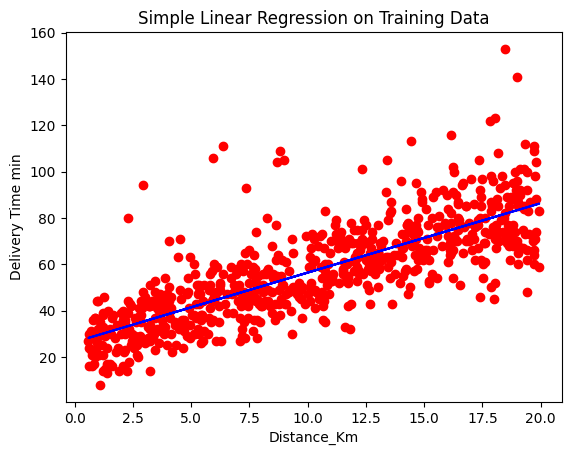

In [14]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title("Simple Linear Regression on Training Data")
plt.xlabel("Distance_Km")
plt.ylabel("Delivery Time min")
plt.show()

In [15]:
y_pred = regressor.predict(X_test)

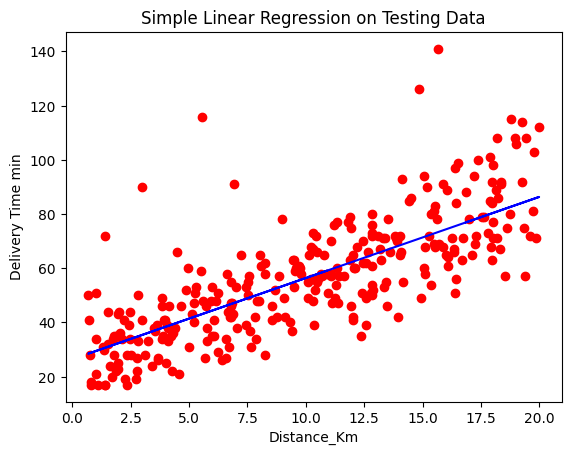

In [16]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
# y_pred  because it is predicted salaries for x_test
plt.title("Simple Linear Regression on Testing Data")
plt.xlabel("Distance_Km")
plt.ylabel("Delivery Time min")
plt.show()

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 10.498141357775829
MSE: 202.5473996851295
RMSE: 14.231914828480724


In [18]:
import pickle

filename = 'finalized_model.pkl'
pickle.dump(regressor, open(filename, 'wb'))
